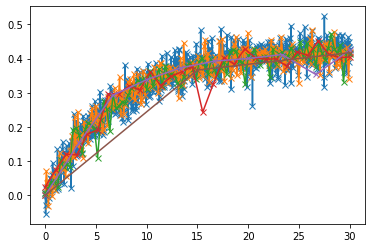

In [1]:
import pyabc
from study_abc_noise.model import ConversionReactionLaplaceModelVars as ModelVars
import matplotlib.pyplot as plt
import numpy as np
import os
import logging
%matplotlib inline

# for debugging
for module in ['Distance', 'Acceptor', 'Epsilon']:
    logger = logging.getLogger(module)
    logger.setLevel(logging.DEBUG)
    fh = logging.FileHandler('log/logger_laplace.log')
    fh.setLevel(logging.DEBUG)
    logger.addHandler(fh)

arr_n_t = [3, 10, 30, 100, 300, 1000]

# create data
for n_t in reversed(arr_n_t):
    fn = f"data_laplace_{n_t}"
    mv = ModelVars(n_t=n_t)
    if not os.path.isfile(fn + '.npy'):
        print(f"generate data for time {n_t}")
        data = mv.generate_data()
        np.save(fn, data['y'])
    data = np.load(fn + '.npy')
    plt.plot(mv.get_ts(), data, 'x-')

In [2]:
# proposed method

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"cr_laplace_{n_t}_stochacc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = {'y': np.load(f"data_laplace_{n_t}.npy")}
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-20 09:54:51.023973, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=6.1988e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [153.9052906433943].
INFO:ABC:t: 0, eps: 153.9052906433943.
DEBUG:Acceptor:Encountered pd=6.2702e+01 > c=6.1988e+01, thus weight=1.0046e+00.
INFO:ABC:Acceptance rate: 1000 / 3396 = 2.9446e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=6.2702e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [79.5952860134724, 76.95264532169715].
INFO:ABC:t: 1, eps: 76.95264532169715.
Process Process-57:
Process Process-41:
Process Process-42:
Process Process-43:
Process Process-53:
Process Process-54:
Process Process-59:
Process Process-44:
Process Process-46:
Process Process-58:
Process Process-49:
Process Process-56:
Process Process-50:
Process Process-60:
Traceback (most recent call last):
Process Process-48:
Traceback (most recent call last):
Traceback (most recent call last):
Proces

  File "/home/yannik/pyabc/pyabc/smc.py", line 583, in simulate_one
    transitions)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/smc.py", line 638, in _generate_valid_proposal
    theta_ss = transitions[m_ss].rvs()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/smc.py", line 594, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/smc.py", line 583, in simulate_one
 

  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 1229, in wrapper
    res = na_op(values, other)
  File "/home/yannik/pyabc/pyabc/smc.py", line 638, in _generate_valid_proposal
    theta_ss = transitions[m_ss].rvs()
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4937, in sample
    if (weights == np.inf).any() or (weights == -np.inf).any():
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/smc.py", 

  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py", line 101, in _evaluate_numexpr
    if _can_use_numexpr(op, op_str, a, b, "evaluate"):
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/conversion_reaction.py", line 192, in x
    sol[:, ix] = np.dot(A, x0).flatten()
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
KeyboardInterrupt
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/base.py", line 267, in is_dtype
    return cls.construct_from_string(dtype) is not None
  File "/home/yannik/pyabc/pyabc/transition/transitionmeta.py", line 37, in rvs_single
    return f(self)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/internals/managers.py", line 1271, in reindex_indexer
    return self.__class__(new_blocks, new_axes)
  File "/home/yannik/anaconda3/lib/pyt

  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/dtypes.py", line 1110, in is_dtype
    return super().is_dtype(dtype)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/base.py", line 254, in is_dtype
    dtype = getattr(dtype, "dtype", dtype)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/common.py", line 675, in is_interval_dtype
    return IntervalDtype.is_dtype(arr_or_dtype)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/internals/managers.py", line 1396, in take
    new_axis=new_labels, indexer=indexer, axis=axis, allow_dups=True
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/base.py", line 254, in is_dtype
    dtype = getattr(dtype, "dtype", dtype)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/internals/managers.py", line 438, in apply
    applied = getattr(b, f)(**kwargs)
  File "/home/yannik/anaconda3/lib/python3

KeyboardInterrupt: 

In [ ]:
# sequential but bad c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"cr_laplace_{n_t}_stochacc_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = {'y': np.load(f"data_laplace_{n_t}.npy")}
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run()
    print()

In [ ]:
# rejection with adaptive c (in general not applicable)

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"cr_laplace_{n_t}_rejection"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = {'y': np.load(f"data_laplace_{n_t}.npy")}
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1)
    print()

In [ ]:
# rejection with bad (but correct) c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"cr_laplace_{n_t}_rejection_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
    )
    data = {'y': np.load(f"data_laplace_{n_t}.npy")}
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1)
    print()

In [ ]:
# noisy model

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"cr_laplace_{n_t}_noisymodel"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model_noisy(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_distance(),
        population_size=1000,
        #sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = {'y': np.load(f"data_laplace_{n_t}.npy")}
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

## Plots